In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
from typing import Callable

# Initializations

### Generate non-linear data

In [2]:
n_samples = 600
input_dim = 3
input = tf.random.uniform([n_samples, input_dim], dtype = tf.float32)

In [3]:
print(input)

tf.Tensor(
[[0.30160534 0.9286134  0.51420283]
 [0.21503651 0.14981866 0.6823653 ]
 [0.8095802  0.60020506 0.4681263 ]
 ...
 [0.69586587 0.691795   0.647262  ]
 [0.48817146 0.14906251 0.8136369 ]
 [0.92083347 0.77633965 0.39767337]], shape=(600, 3), dtype=float32)


### Initialize weights and bias

In [4]:
weights_true = tf.transpose(tf.Variable([[1, -1, 2]], dtype=tf.float32))
bias_true = tf.Variable([1,2,3], dtype = tf.float32)
y_true = (tf.einsum('ij, jk -> ik', (input**3),  weights_true) + tf.einsum('ij, jk -> ik', (input**2),  weights_true) + tf.einsum('ij, jk -> ik', input, weights_true) + bias_true)


# x_tensor = input.clone().detach().requires_grad_(True).float()
# y_true_tensor = y_true.clone().detach().requires_grad_(True).float()

print(f'weights: {weights_true.shape}, bias: {bias_true.shape}')

weights: (3, 1), bias: (3,)


### Hyperparameter initializations

In [5]:
output_dim = 1
hidden1 = 10
hidden2 = 5
alpha = 0.01
epochs = 850



In [6]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(input)
view.shape

(600, 2)

# Non-linear regression using tensorflow low level API

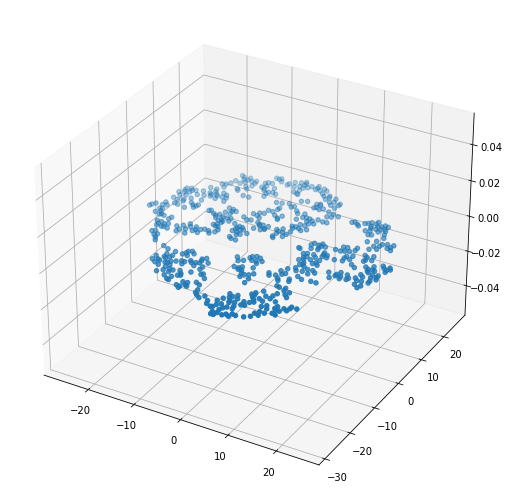

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(15,9))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [8]:
#weights and biases 
weights = {'weight1' : tf.Variable(tf.random.normal([input_dim, hidden1])),
            'weight2' : tf.Variable(tf.random.normal([hidden1, hidden2])),
            'weight3' : tf.Variable(tf.random.normal([hidden2, output_dim]))}

biases = {'bias1': tf.Variable(tf.zeros([hidden1])),
          'bias2' : tf.Variable(tf.zeros([hidden2])),
          'bias3' : tf.Variable(tf.zeros([output_dim]))}


# X_placeholder = tf.placeholder(shape=[None, input_dim], dtype=tf.float32, name='X')
# y_placeholder = tf.placeholder(shape=[None, output_dim], dtype=tf.float32, name='y')

#forward propagation
def forward_pass(X):
    h1 = tf.nn.relu(tf.einsum('ij,jk->ik', X, weights['weight1']) + biases['bias1'])
    h2 = tf.nn.relu(tf.einsum('ij,jk->ik', h1, weights['weight2']) + biases['bias2'])
    output = tf.einsum('ij,jk->ik', h2, weights['weight3']) + biases['bias3']
    return output

# define the optimizer
optimizer = tf.keras.optimizers.SGD(alpha)

# define the training step
def train(x, y_true):
  with tf.GradientTape() as tape:
    y_pred = forward_pass(input)
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
  gradients = tape.gradient(loss, [weights['weight1'], biases['bias1'], weights['weight2'], biases['bias2'], weights['weight3'], biases['bias3']])
  optimizer.apply_gradients(zip(gradients, [weights['weight1'], biases['bias1'], weights['weight2'], biases['bias2'], weights['weight3'], biases['bias3']]))
  return loss

# train the model
loss_ = []
for epoch in range(epochs):
    loss_value = train(input, y_true)
    loss_.append(loss_value)
    print(f"Epoch {epoch}: Loss = {loss_value}")


Epoch 0: Loss = 21.914018630981445
Epoch 1: Loss = 14.78511905670166
Epoch 2: Loss = 9.526412963867188
Epoch 3: Loss = 6.088165283203125
Epoch 4: Loss = 4.303350925445557
Epoch 5: Loss = 3.5934789180755615
Epoch 6: Loss = 3.3365273475646973
Epoch 7: Loss = 3.21410870552063
Epoch 8: Loss = 3.1230008602142334
Epoch 9: Loss = 3.0407352447509766
Epoch 10: Loss = 2.9650402069091797
Epoch 11: Loss = 2.8934121131896973
Epoch 12: Loss = 2.8263487815856934
Epoch 13: Loss = 2.762058973312378
Epoch 14: Loss = 2.7011778354644775
Epoch 15: Loss = 2.6423873901367188
Epoch 16: Loss = 2.585385799407959
Epoch 17: Loss = 2.530803680419922
Epoch 18: Loss = 2.478624105453491
Epoch 19: Loss = 2.42828369140625
Epoch 20: Loss = 2.3793880939483643
Epoch 21: Loss = 2.3318517208099365
Epoch 22: Loss = 2.2856006622314453
Epoch 23: Loss = 2.240882158279419
Epoch 24: Loss = 2.197899580001831
Epoch 25: Loss = 2.1565239429473877
Epoch 26: Loss = 2.116018533706665
Epoch 27: Loss = 2.0768682956695557
Epoch 28: Loss = 

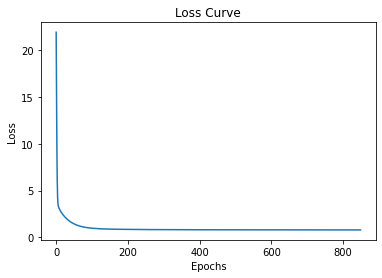

In [9]:
plt.plot(range(epochs), loss_)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

ValueError: ignored

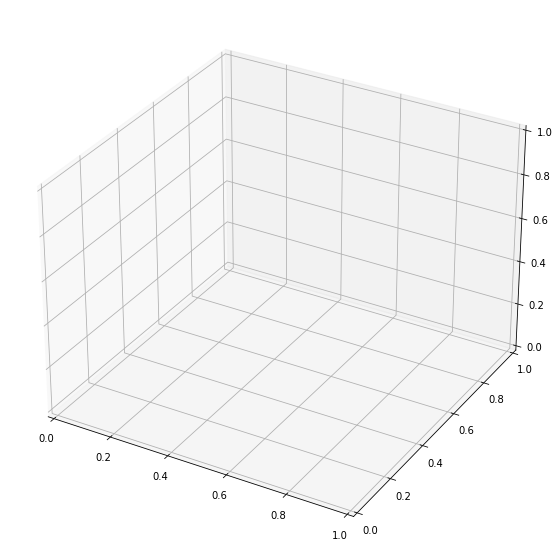

In [13]:

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
# fig.colorbar(sc)
# sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=forward_pass(input), cmap='hot', label='Our function', marker='.')
# fig.colorbar(sc)

# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('x3')
# ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

# plt.legend()
# plt.show()

In [14]:
# def plot_3d(x, y, y_pred=None):
#   import matplotlib.pyplot as plt
#   from mpl_toolkits.mplot3d import Axes3D
#   fig = plt.figure()
#   ax = fig.add_subplot(111, projection='3d')
#   ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
#   if y_pred is not None:
#     ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
#   plt.legend()

In [16]:
# plot_3d(input, y_true[:, 0].numpy(), y_pred=y_pred[:, 0].numpy())

NameError: ignored

Using Built-in layers 

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers.legacy import SGD

In [18]:
class Linear(Layer):
  def __init__(self, units):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.wts = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
      self.bias = self.add_weight(shape=(self.units,), initializer='random_normal', trainable=True)

  def call(self, inputs):
      return tf.einsum('ij, jk -> ik', inputs, self.wts) + self.bias

In [19]:
class Model(Layer):
  def __init__(self):
      super(Model, self).__init__()
      self.input_layer = Linear(input_dim)
      self.hidden_1 = Linear(hidden1)
      self.hidden_2 = Linear(hidden2)
      self.output_layer = Linear(output_dim)

  def call(self, input, training=None):
      x = self.input_layer(input)
      x = tf.nn.relu(x)
      x = self.hidden_1(x)
      x = tf.nn.relu(x)
      x = self.hidden_2(x)
      x = tf.nn.relu(x)
      x = self.output_layer(x)
      return x

In [20]:
model = Model()
y_pred = model(input, training=True)

In [21]:
def plot(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE plot for y_true and y_pred distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

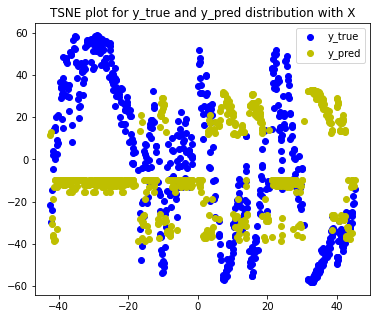

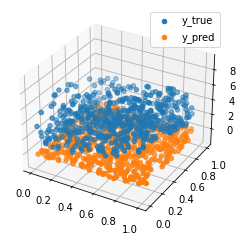

In [22]:
plot(input, y_true, y_pred)
plot_3d(input, y_true[:, 0], y_pred=y_pred[:, 0])

# Using Functional API 

In [23]:
x_ = tf.keras.layers.Input(shape=(input_dim,))
h1 = tf.keras.layers.Dense(hidden1, activation='relu')(x_)
h2 = tf.keras.layers.Dense(hidden2, activation='relu')(h1)
y = tf.keras.layers.Dense(output_dim, activation=None)(h2)

In [32]:
optimizer = SGD(lr=alpha)
loss_mse = tf.keras.losses.MeanSquaredError()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
model = tf.keras.Model(inputs=x_, outputs=y)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
epochs_400 = 400
model.compile(optimizer=optimizer, loss=loss_mse)
fit_model = model.fit(input, y_true, epochs=epochs_400)
y_pred = model.predict(input)

Epoch 1/400
19/19 [==============================] - 0s 1ms/step - loss: 0.6727
Epoch 2/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6727
Epoch 3/400
19/19 [==============================] - 0s 1ms/step - loss: 0.6731
Epoch 4/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6729
Epoch 5/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6730
Epoch 6/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6727
Epoch 7/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6731
Epoch 8/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6727
Epoch 9/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 10/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 11/400
19/19 [==============================] - 0s 1ms/step - loss: 0.6729
Epoch 12/400
19/19 [==============================] - 0s 2ms/step - loss: 0.6728
Epoch 13/400
19/19 [=================

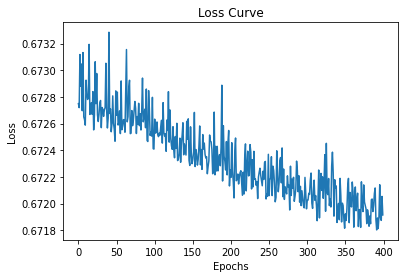

In [41]:
plt.plot(fit_model.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Using High-level API

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden1, input_dim=input_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(hidden2, activation=tf.nn.relu),
    tf.keras.layers.Dense(output_dim, activation=None)
])

In [43]:
optimizer = SGD(lr=alpha)
loss_highAPI = tf.keras.losses.MeanSquaredError()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [44]:
model.compile(optimizer=optimizer, loss=loss_highAPI)

# Model training
history = model.fit(input, y_true, epochs=epochs_400)

Epoch 1/400
19/19 [==============================] - 1s 3ms/step - loss: 11.5374
Epoch 2/400
19/19 [==============================] - 0s 3ms/step - loss: 3.0496
Epoch 3/400
19/19 [==============================] - 0s 2ms/step - loss: 2.0803
Epoch 4/400
19/19 [==============================] - 0s 2ms/step - loss: 1.3478
Epoch 5/400
19/19 [==============================] - 0s 2ms/step - loss: 1.0291
Epoch 6/400
19/19 [==============================] - 0s 2ms/step - loss: 0.9279
Epoch 7/400
19/19 [==============================] - 0s 2ms/step - loss: 0.9029
Epoch 8/400
19/19 [==============================] - 0s 2ms/step - loss: 0.8903
Epoch 9/400
19/19 [==============================] - 0s 2ms/step - loss: 0.8866
Epoch 10/400
19/19 [==============================] - 0s 2ms/step - loss: 0.8816
Epoch 11/400
19/19 [==============================] - 0s 2ms/step - loss: 0.8858
Epoch 12/400
19/19 [==============================] - 0s 3ms/step - loss: 0.8810
Epoch 13/400
19/19 [================

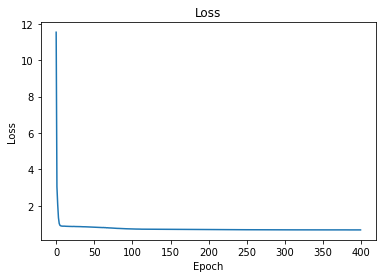

In [48]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()